# 勾配降下法
- 勾配降下法においてどのようにパラメータが更新されるかを、グラフを使って確認しよう

## 0. 用語の復習

### 勾配降下法
関数の勾配が最も急な方向に進みながら、最小値や極小値をとるパラメータを探索する方法

#### [例題] 2次2変数の最小値探索問題（凸2次計画問題）
- 関数 $f(x,y)=(x-3)^2+(2y-1)^2$の最小点を求めよ

#### [解答例]
- まずは、$x,y$のそれぞれについて微分を行う（偏微分）
    - $\frac{\partial f}{\partial x} = 2x -6$
    - $\frac{\partial f}{\partial y} = 8y -4$
- 微分の結果は、関数の傾き（勾配）を表す
- $\frac{\partial f}{\partial x} = \frac{\partial f}{\partial y} = 0$となる$(x, y)$を見つけられれば、そこが最小点
    - $2x-6=0$よりx=3
    - $8y-4=0$よりy=0.5
    - よって関数が最小値を取る点は(3, 0.5)
#### [勾配のイメージ]
- 最小値を探す際に進むべき方向は「関数の値が小さくなる方向」
- 勾配に-1を掛けて符号を反転させる（負の勾配ベクトル）
    - $- \nabla f(x,y)=(-(2x-6),-(8y-4)) = (-2x+6,-8y+4)$
  

- 例えば $- \nabla f(1,1)=(-2 \times 1 + 6,-8 \times1+4)=(4,-4)$
    - $(x,y)=(1,1)$上の球は、右下45°の方向に転がっていく


#### [目的関数の勾配]
- 実際にモデルの更新に用いる場合は、目的関数$L(\mathbf{w})$とパラメータ$\mathbf{w}$の関係が複雑であるため、$\frac{\partial L(\mathbf{w})}{\partial \mathbf{w}} = 0$は解析的に求まらない
- そこで、繰り返し計算によって最適な$\mathbf{w}$を求める
    - (1) データの一部を使って、勾配$\frac{\partial L(\mathbf{w})}{\partial \mathbf{w}}$を計算
    - (2) 負の勾配ベクトルを使って、パラメータ$\mathbf{w}$を更新
        - $w_{t+1} = w_t - \eta \frac{\partial L}{\partial \mathbf{w}}$
        - $\eta$: 学習率
    - 勾配の値が閾値以下になるまで(1)(2)を繰り返す


## 1. ライブラリの読み込み

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. 目的関数のグラフを作成
- ここでは目的関数を $z = f(x,y) = (x-3)^2 + (2y-1)^2$ とする

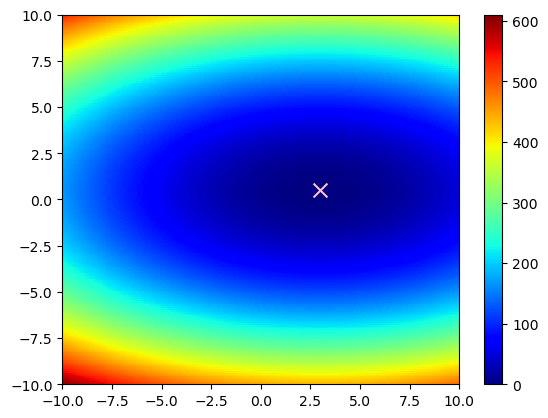

In [2]:
# 目的関数の定義
def func(x, y):
    return (x-3)**2 + (2*y-1)**2

# x軸、y軸の値を生成
axis_x = np.arange(-10,10,0.1)
axis_y = np.arange(-10,10,0.1)
# 格子点の作成
mx, my = np.meshgrid(axis_x, axis_y) 

# z軸（目的関数）の値を格納する配列
mz = np.ones([200,200])
# 各点におけるzを計算
for i, y in enumerate(axis_y): # y軸のループ
    z = [] 
    for x in axis_x: # x軸のループ
        z.append(func(x, y))
    mz[i] = z 
    
# 目的関数の値を色として表示
plt.pcolor(mx,my,mz,cmap="jet")
plt.colorbar()
# 目的関数の最小値を×で表示
plt.scatter(x=3,y=0.5,marker="x",s=100,c="pink")

# 表示範囲の調整
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

## 3. 勾配降下法の計算
- 学習率：$\eta=0.1$
- 収束条件：（勾配の大きさ）$<1.0e-5$

In [3]:
# 条件設定
x = -9      # xの初期値
y = -9      # yの初期値
alpha = 0.1 # 学習率
norm = 1    # 勾配ベクトルのノルム
threshold = 1.0e-5 # 閾値（収束条件）
i = 0       # 現在の更新回数
maxIter = 1000 # 更新回数の上限

# 結果を格納するためのデータフレーム
df_re = pd.DataFrame()
df_re.loc[i,"x"] = x
df_re.loc[i,"y"] = y
df_re.loc[i,"norm"] = norm
i += 1

# 勾配の大きさが閾値以下になるまで繰り返す
while norm > threshold:
    dx = -2 * x + 6 # ∂f/∂xの計算
    dy = -8 * y + 4 # ∂f/∂yの計算
    x += dx * alpha # xの更新
    y += dy * alpha # yの更新
    norm = np.linalg.norm([dx,dy]) # 勾配の大きさ
    # データフレームに値を格納
    df_re.loc[i,"x"] = x
    df_re.loc[i,"y"] = y
    df_re.loc[i,"norm"] = norm
    i += 1
    # 更新回指数が上限を越えたら終了
    if i > maxIter:
        break

# 更新回数・最小点・勾配の大きさを表示
print(f"iter_num: {i}, ({round(x,3)}, {round(y,3)})")
print(f"grad = {norm}")

iter_num: 68, (3.0, 0.5)
grad = 9.641628265555369e-06


## 4. 結果の可視化

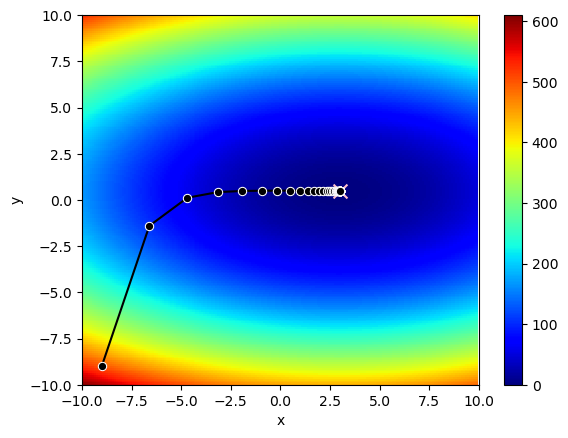

In [4]:
# 目的関数の値を色として表示
plt.pcolor(mx,my,mz,cmap="jet")
plt.colorbar()
# 目的関数の最小値を×で表示
plt.scatter(x=3,y=0.5,marker="x",s=100,c="pink")

# 探索点を●で表示
sns.lineplot(x=df_re["x"], y=df_re["y"], 
             marker="o", color="k")

#表示範囲の調整
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

### [演習]
- 以下のようにパラメータを変更し、グラフの変化を確認してみよう
    - 初期値$(x, y)=(9, 9)$の場合
    - 学習率$\alpha=0.2$の場合
    - 学習率$\alpha=0.3$の場合